In [15]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
    save_to_dir = "AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [17]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.58423877 0.57247406 0.6156113 ]
  [0.5816064  0.5698417  0.61297894]
  [0.578974   0.5672093  0.61034656]
  ...
  [0.712548   0.7047049  0.75568527]
  [0.7005545  0.69271135 0.74369174]
  [0.7032993  0.69545615 0.74643654]]

 [[0.6027383  0.5909736  0.63411087]
  [0.60493195 0.59316725 0.6363045 ]
  [0.6071256  0.5953609  0.6384981 ]
  ...
  [0.7140836  0.7062405  0.75722086]
  [0.6987996  0.6909565  0.74193686]
  [0.70439607 0.69655293 0.7475333 ]]

 [[0.5738933  0.5621286  0.60526586]
  [0.57433206 0.56256735 0.6057046 ]
  [0.5747708  0.5630061  0.60614336]
  ...
  [0.7156192  0.70777607 0.75875646]
  [0.6970447  0.68920153 0.7401819 ]
  [0.7054929  0.6976498  0.74863017]]

 ...

 [[0.58884776 0.5613968  0.58884776]
  [0.66851735 0.6410664  0.66851735]
  [0.6317602  0.6043092  0.6317602 ]
  ...
  [0.7072542  0.6876463  0.71117574]
  [0.7065961  0.68698823 0.71051764]
  [0.705938   0.68633014 0.70985955]]

 [[0.59499    0.56753904 0.59499   ]
  [0.6669818  0.63953084 0.6669818 ]


In [19]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [20]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
1507/32

47.09375

In [25]:
215/32

6.71875

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 320s 6s/step - accuracy: 0.4901 - loss: 0.9297 - val_accuracy: 0.5260 - val_loss: 0.8948
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 3:58 5s/step - accuracy: 0.6250 - loss: 0.8940

C:\Users\tanji\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6250 - loss: 0.8940 - val_accuracy: 0.3913 - val_loss: 0.8727
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 282s 6s/step - accuracy: 0.5958 - loss: 0.8085 - val_accuracy: 0.6771 - val_loss: 0.6328
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6562 - loss: 0.5889 - val_accuracy: 0.7826 - val_loss: 0.4235
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 285s 6s/step - accuracy: 0.7347 - loss: 0.5793 - val_accuracy: 0.7604 - val_loss: 0.5101
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7500 - loss: 0.5179 - val_accuracy: 0.9130 - val_loss: 0.3378
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 289s 6s/step - accuracy: 0.8135 - loss: 0.4252 - val_accuracy: 0.9115 - val_loss: 0.2816
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9375 - loss: 0.1946 - val_accuracy: 0.7826 - val_loss: 0.3797
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 298s 6s/step - accuracy: 0.8960 - loss: 0.2656 - val_accuracy: 0.8802 - val_loss: 0.

In [27]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9315 - loss: 0.1702


In [28]:
scores

[0.1630389243364334, 0.9350348114967346]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
type(history.history['loss'])

list

In [33]:
len(history.history['loss'])

20

In [34]:
history.history['loss'][:5]

[0.8846113681793213,
 0.8939810991287231,
 0.7389966249465942,
 0.5889325141906738,
 0.5664147138595581]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [36]:
val_acc

[0.5260416865348816,
 0.3913043439388275,
 0.6770833134651184,
 0.782608687877655,
 0.7604166865348816,
 0.9130434989929199,
 0.9114583134651184,
 0.782608687877655,
 0.8802083134651184,
 0.8695651888847351,
 0.8802083134651184,
 0.95652174949646,
 0.921875,
 0.9130434989929199,
 0.90625,
 1.0,
 0.9270833134651184,
 0.95652174949646,
 0.9114583134651184,
 1.0]

In [37]:
acc

[0.502713680267334,
 0.625,
 0.6499321460723877,
 0.65625,
 0.7388059496879578,
 0.75,
 0.8208954930305481,
 0.9375,
 0.8887381553649902,
 1.0,
 0.9043419361114502,
 0.9375,
 0.9348710775375366,
 0.90625,
 0.9192672967910767,
 0.96875,
 0.9382632374763489,
 0.96875,
 0.9158751964569092,
 0.90625]

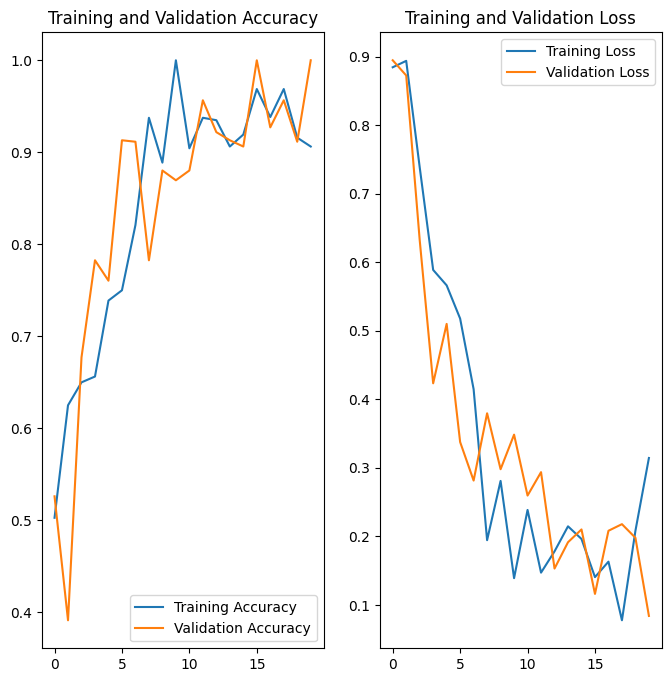

In [38]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Early_blight


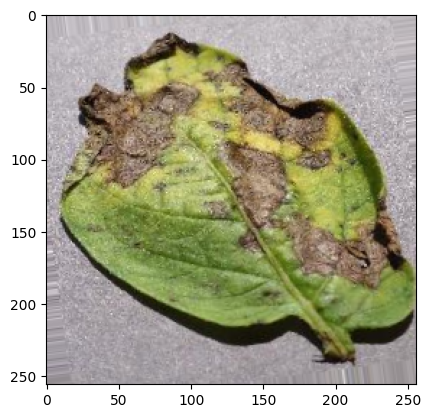

In [39]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


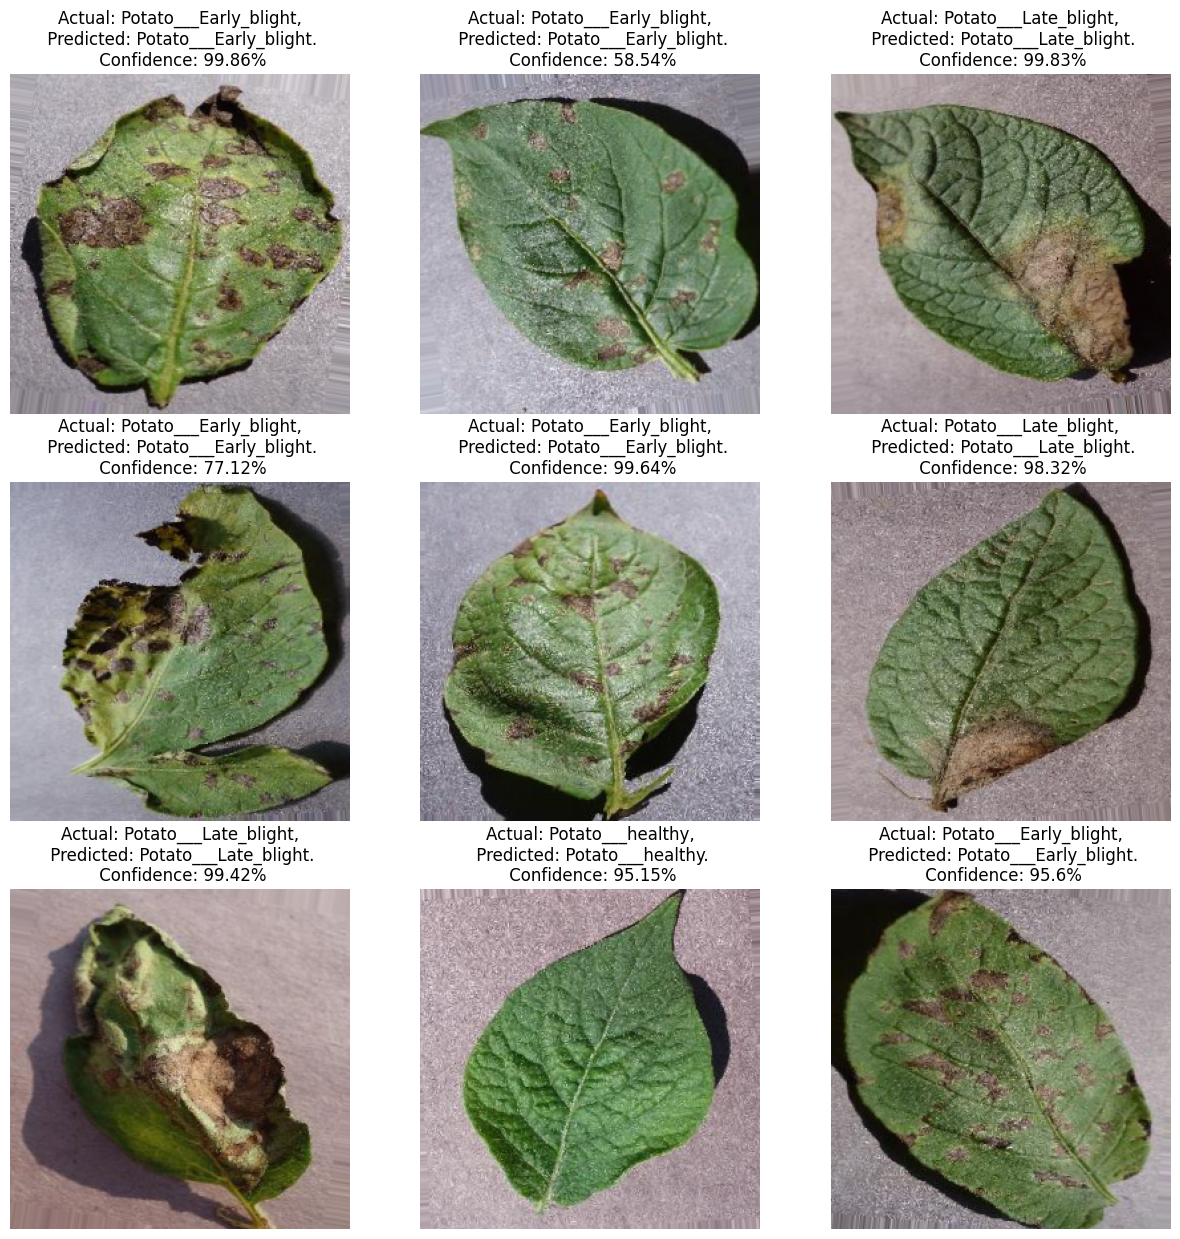

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [43]:
model.save("../potatoes.h5")